In [2]:
import intrinsic_params
from bilby.core.result import read_in_result
from scipy.interpolate import interp1d
import numpy as np
import deepdish as dd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.__version__

'1.21.0'

In [3]:
PP_path = '../GWTC-3-population-data/analyses/PowerLawPeak/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_result.json'
PP_result = read_in_result(PP_path)

In [4]:
PP_hyperposterior_samples = PP_result.posterior.copy() # making a copy is best practice here so you don't accidentally modify things in-place
PP_hyperposterior_samples

,alpha,beta,mmax,mmin,lam,mpp,sigpp,delta_m,mu_chi,sigma_chi,...,lamb,amax,log_likelihood,log_prior,selection,pdet_n_effective,surveyed_hypervolume,log_10_rate,rate,min_event_n_effective
0,3.476035,1.192781,91.137635,3.335027,0.045152,32.019619,7.361617,5.502380,0.430299,0.037676,...,0.593878,1.0,86.219165,-20.158271,0.001980,5600.884717,1102.923927,1.539321,34.619495,184.210871
1,2.843807,0.551632,92.336309,3.455594,0.099132,21.146326,9.635711,3.504334,0.229716,0.027052,...,3.899003,1.0,88.795439,-20.158271,0.000176,7628.305892,24548.963167,1.203419,15.974191,91.831207
2,4.127894,1.910420,99.382743,4.114949,0.058528,26.304442,9.105968,4.430823,0.297703,0.036759,...,-0.096742,1.0,89.598445,-20.158271,0.002577,4734.966457,617.064144,1.681428,48.020645,94.982019
3,4.512565,1.291055,98.845047,2.963035,0.007879,32.267134,9.914114,9.800366,0.378698,0.052658,...,3.511903,1.0,90.035214,-20.158271,0.000295,5654.797132,16703.390755,1.146385,14.008291,289.936772
4,2.772482,0.149371,94.491001,5.138160,0.035747,30.469008,8.569162,3.361789,0.336149,0.034270,...,2.514446,1.0,90.339131,-20.158271,0.000582,8247.427572,6336.065138,1.302851,20.084052,261.964627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11179,3.388853,1.075150,89.768520,4.684262,0.030388,35.727936,3.478996,5.246642,0.244086,0.027675,...,2.733047,1.0,107.871029,-20.158271,0.000525,3796.539977,7811.787060,1.235183,17.186329,71.639539
11180,3.684463,1.539779,81.785901,5.327478,0.030328,34.102957,3.505780,5.133147,0.251205,0.033394,...,3.171738,1.0,107.877236,-20.158271,0.000377,4006.532961,11954.783380,1.175202,14.969305,72.109121
11181,3.684463,1.539779,81.785901,5.327478,0.030328,34.102957,3.505780,5.133147,0.251205,0.033394,...,3.171738,1.0,107.877236,-20.158271,0.000377,4006.532961,11954.783380,1.169904,14.787819,72.109121
11182,3.573136,0.627634,88.689645,5.303211,0.029184,34.600418,3.531467,4.342366,0.229689,0.032670,...,3.456785,1.0,107.909312,-20.158271,0.000266,3745.787380,15818.169705,1.239911,17.374440,73.194989


In [6]:
#Randomly selecting no_hyperpostsamps hyperposterior samples from data file, and sampling no_samps samples from each hyperpostsamps
no_hyperpostsamps = 10
no_samps=100
total_hyperpost_samps = PP_hyperposterior_samples.shape[0]

hyperpost_idxs = np.random.random_integers(0,total_hyperpost_samps,no_hyperpostsamps)
all_intrins_samps = []

for i in range(no_hyperpostsamps):
    sample = intrinsic_params.sample_intrinsic(PP_hyperposterior_samples.iloc[hyperpost_idxs[i]], no_samps)
    all_intrins_samps.append(sample)


/tmp/ipykernel_822229/3991536496.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 11184 + 1) instead
  hyperpost_idxs = np.random.random_integers(0,11184,no_hyperpostsamps)


[[ 3.27943361e+01  7.25008752e-01  2.25739712e+00  2.61782995e-01
   2.01689940e-01  7.01353570e-01  9.88866279e-01]
 [ 7.50214915e+00  9.04693310e-01  1.34130300e+00  5.32749260e-01
   1.24271847e-01  9.80933387e-01 -6.25544030e-01]
 [ 6.69456240e+00  9.92285151e-01  1.21180622e+00  4.52561593e-01
   1.00182488e-01  7.11978101e-01  7.54852199e-01]
 [ 3.42319981e+01  9.88799118e-01  1.07327582e+00  1.62456975e-01
   1.63656267e-01  8.04008033e-02  6.72286963e-02]
 [ 9.91337402e+00  8.80589948e-01  1.24015724e+00  1.59182460e-02
   2.76940823e-01  9.70526668e-01 -4.92685740e-01]
 [ 7.88431211e+00  8.67972819e-01  1.49267175e+00  3.95296311e-01
   4.40048133e-01  8.04294283e-01 -8.66892020e-01]
 [ 6.24448154e+00  7.46200044e-01  1.94794824e+00  9.36444419e-02
   7.73673848e-02  9.33951251e-01  5.13811335e-01]
 [ 1.23082331e+01  9.78873761e-01  2.15084998e+00  2.17621979e-01
   2.21760412e-01  5.08594014e-01  4.08030911e-01]
 [ 9.57053622e+00  9.28928848e-01  1.83046899e+00  1.98650042e-0

In [5]:
#Generating no_samps from all hyperposterior samples

no_samps=3
total_hyperpost_samps = PP_hyperposterior_samples.shape[0]
all_intrins_samps = []

for idx, hyperpostsamp in PP_hyperposterior_samples.iloc[:100].iterrows():
    sample = intrinsic_params.sample_intrinsic(hyperpostsamp, no_samps)
    all_intrins_samps.append(sample)

/data/wiay/2297403c/conda_envs/GWTC-3-population/lib/python3.9/site-packages/gwpopulation/models/mass.py:552: RuntimeWarning: divide by zero encountered in true_divide
  delta_m / shifted_mass + delta_m / (shifted_mass - delta_m)
/data/wiay/2297403c/conda_envs/GWTC-3-population/lib/python3.9/site-packages/gwpopulation/models/mass.py:554: RuntimeWarning: overflow encountered in exp
  window[smoothing_region] = 1 / (xp.exp(exponent) + 1)
/data/wiay/2297403c/conda_envs/GWTC-3-population/lib/python3.9/site-packages/gwpopulation/utils.py:38: RuntimeWarning: divide by zero encountered in log
  ln_beta = (alpha - 1) * xp.log(xx) + (beta - 1) * xp.log(scale - xx)
/data/wiay/2297403c/conda_envs/GWTC-3-population/lib/python3.9/site-packages/gwpopulation/utils.py:77: RuntimeWarning: divide by zero encountered in power
  prob = xp.power(xx, alpha)
/data/wiay/2297403c/conda_envs/GWTC-3-population/lib/python3.9/site-packages/gwpopulation/utils.py:79: RuntimeWarning: invalid value encountered in mult

In [7]:
comb_intrins_samps = np.reshape(np.array(all_intrins_samps), (100*no_samps, 7))

In [8]:
comb_intrins_samps

array([[ 7.06905492e+00,  7.08992947e-01,  2.17395713e+00, ...,
         7.24952805e-01,  1.59271169e-01,  7.74936218e-01],
       [ 7.05731389e+00,  7.50597114e-01,  1.44841902e+00, ...,
         3.91266387e-01, -9.88372996e-01,  3.73501930e-01],
       [ 8.48327825e+00,  9.53775510e-01,  1.68194961e+00, ...,
         4.55447123e-01, -9.75474112e-01, -5.12151714e-03],
       ...,
       [ 2.08730830e+01,  8.40521016e-01,  5.98414234e-01, ...,
         4.31379709e-01,  5.62846976e-01, -6.39523999e-01],
       [ 7.68980740e+00,  9.40089749e-01,  1.52128082e+00, ...,
         9.49192596e-02, -2.58194574e-01,  1.82839525e-01],
       [ 6.69876346e+00,  8.44478665e-01,  1.47824951e+00, ...,
         7.67867151e-02,  8.22866635e-01,  3.58927125e-01]])

In [9]:
params = ['m1', 'q', 'z', 'chi_1', 'chi_2','costilt_1','costilt_2']
pd.DataFrame(np.array(comb_intrins_samps), columns=params).to_hdf('all_intrins_samps.hdf5', key='all_intrins_samps')


In [3]:
comb_intrins_samps = pd.read_hdf('all_intrins_samps.hdf5', key='all_intrins_samps')

In [5]:
comb_intrins_samps

,m1,q,z,chi_1,chi_2,costilt_1,costilt_2
0,6.211471,0.952378,1.473356,0.511967,0.236331,-0.387669,0.734416
1,11.027693,0.947024,0.500360,0.307015,0.409889,0.371688,0.652073
2,6.263254,0.743411,0.864877,0.545732,0.380593,0.581407,-0.345462
3,12.898140,0.450982,1.825021,0.083421,0.255556,0.527275,0.051393
4,4.978064,0.518346,1.242724,0.062815,0.406811,0.290094,-0.013746
...,...,...,...,...,...,...,...
33547,8.332471,0.916757,0.857322,0.046632,0.366840,0.743708,0.976170
33548,7.701384,0.812288,2.167780,0.108433,0.002414,0.507807,0.328889
33549,7.393936,0.772664,1.838299,0.453134,0.126751,0.843828,0.068140
33550,8.783554,0.891696,0.931503,0.171294,0.204731,0.918720,-0.045692


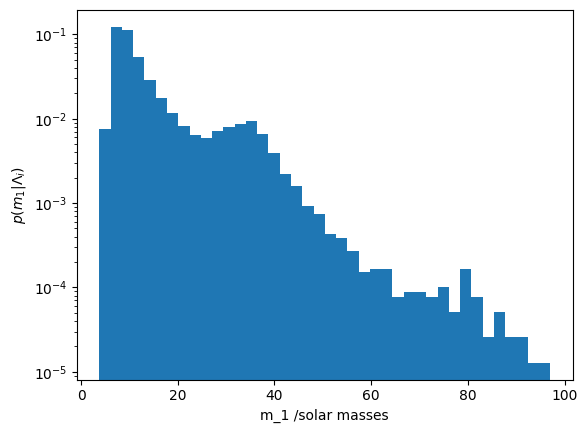

In [10]:
plt.hist(comb_intrins_samps['m1'], density=True, bins=40)
plt.xlabel('m_1 /solar masses')
plt.ylabel(r'$p(m_1|\Lambda_i)$')
plt.yscale('log')

(array([5.39290819e-03, 4.04468114e-03, 1.75269516e-02, 1.88751787e-02,
        2.69645410e-02, 6.47148983e-02, 7.55007147e-02, 7.41524876e-02,
        1.03813483e-01, 1.11902845e-01, 1.44260294e-01, 1.33474478e-01,
        1.56394338e-01, 1.51001429e-01, 1.99537603e-01, 2.65600728e-01,
        2.61556047e-01, 2.84475907e-01, 3.07395767e-01, 3.84244709e-01,
        4.58397196e-01, 4.79968829e-01, 5.59514225e-01, 6.16139761e-01,
        6.78158205e-01, 7.80623461e-01, 9.01963895e-01, 1.07588518e+00,
        1.19452916e+00, 1.42777244e+00, 1.54371997e+00, 1.93740227e+00,
        2.19221718e+00, 2.47399663e+00, 2.88790234e+00, 3.23304846e+00,
        3.95839461e+00, 4.56779324e+00, 5.27156776e+00, 6.20588910e+00]),
 array([0.11574193, 0.13784835, 0.15995478, 0.18206121, 0.20416763,
        0.22627406, 0.24838049, 0.27048691, 0.29259334, 0.31469977,
        0.3368062 , 0.35891262, 0.38101905, 0.40312548, 0.4252319 ,
        0.44733833, 0.46944476, 0.49155118, 0.51365761, 0.53576404,
      

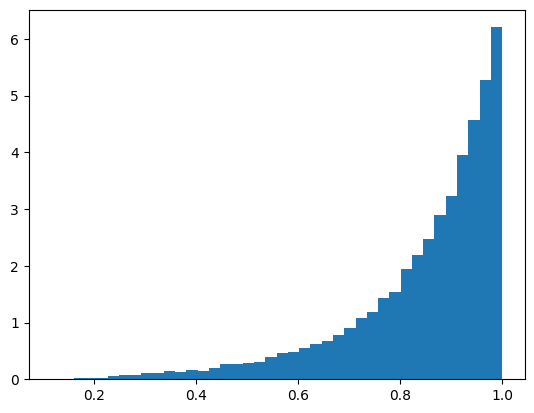

In [13]:
plt.hist(comb_intrins_samps['q'], density=True, bins=40)

(array([0.00428539, 0.01017779, 0.01499885, 0.02249828, 0.0401755 ,
        0.0642808 , 0.05999542, 0.09909957, 0.11624112, 0.12320487,
        0.15695229, 0.16552307, 0.21051963, 0.22605416, 0.23837465,
        0.26890803, 0.29890574, 0.32301104, 0.35408009, 0.39425559,
        0.39479127, 0.41568253, 0.47567794, 0.51424643, 0.55870732,
        0.55442193, 0.57156348, 0.62191677, 0.6454864 , 0.69262566,
        0.78154743, 0.79440359, 0.8645768 , 0.86243411, 0.89725288,
        0.94814185, 1.00974428, 1.02474314, 1.07348941, 1.0799175 ]),
 array([0.07439407, 0.13003335, 0.18567264, 0.24131192, 0.29695121,
        0.35259049, 0.40822978, 0.46386906, 0.51950835, 0.57514763,
        0.63078691, 0.6864262 , 0.74206548, 0.79770477, 0.85334405,
        0.90898334, 0.96462262, 1.02026191, 1.07590119, 1.13154048,
        1.18717976, 1.24281905, 1.29845833, 1.35409761, 1.4097369 ,
        1.46537618, 1.52101547, 1.57665475, 1.63229404, 1.68793332,
        1.74357261, 1.79921189, 1.85485118, 1.

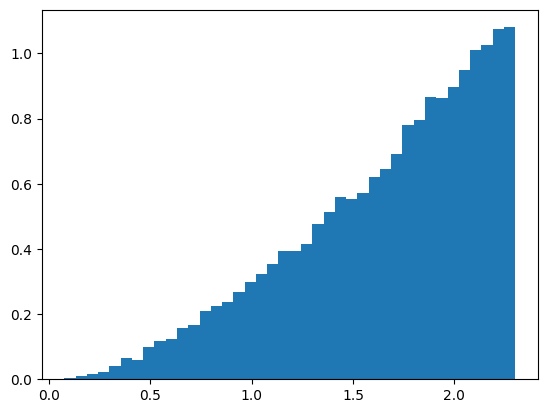

In [14]:
plt.hist(comb_intrins_samps['z'], density=True, bins=40)

(array([1.24185573e+00, 1.95034177e+00, 2.30458479e+00, 2.51178354e+00,
        2.68422637e+00, 2.90746631e+00, 2.77378970e+00, 2.77512647e+00,
        2.74037055e+00, 2.62006160e+00, 2.45697613e+00, 2.38078046e+00,
        2.00514918e+00, 1.99311829e+00, 1.67630472e+00, 1.60946641e+00,
        1.37285881e+00, 1.19105861e+00, 9.47767179e-01, 8.87612704e-01,
        7.23190471e-01, 6.45658036e-01, 5.18665255e-01, 4.18407796e-01,
        3.68947449e-01, 2.60669394e-01, 2.23239942e-01, 1.91157555e-01,
        1.25656015e-01, 8.82265640e-02, 8.82265640e-02, 5.48074109e-02,
        3.60926853e-02, 2.53985563e-02, 1.47044273e-02, 8.02059672e-03,
        1.60411934e-02, 6.68383060e-03, 4.01029836e-03, 2.67353224e-03]),
 array([1.04029728e-05, 2.23063620e-02, 4.46023209e-02, 6.68982799e-02,
        8.91942389e-02, 1.11490198e-01, 1.33786157e-01, 1.56082116e-01,
        1.78378075e-01, 2.00674034e-01, 2.22969993e-01, 2.45265952e-01,
        2.67561911e-01, 2.89857870e-01, 3.12153829e-01, 3.3444

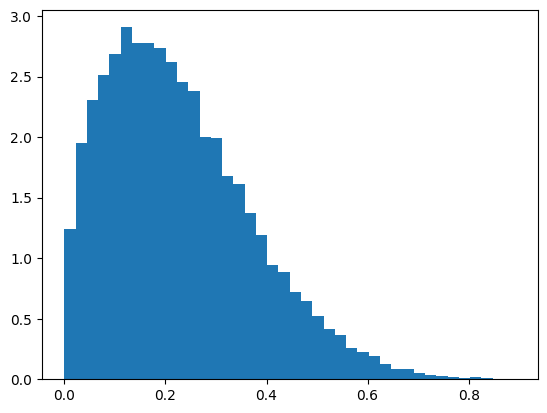

In [15]:
plt.hist(comb_intrins_samps['chi_1'], density=True, bins=40)

(array([168., 243., 231., 155., 113.,  52.,  21.,   9.,   7.,   1.]),
 array([0.00106609, 0.08530064, 0.16953518, 0.25376972, 0.33800427,
        0.42223881, 0.50647335, 0.5907079 , 0.67494244, 0.75917698,
        0.84341152]),
 <BarContainer object of 10 artists>)

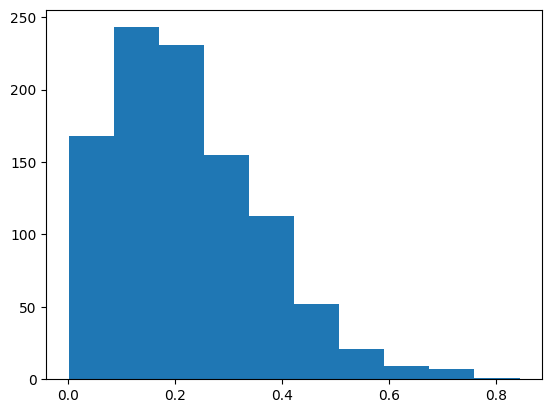

In [13]:
plt.hist(comb_intrins_samps[:,4])

(array([ 67.,  62.,  68.,  73.,  92., 103., 121., 137., 140., 137.]),
 array([-9.99429722e-01, -7.99729666e-01, -6.00029609e-01, -4.00329553e-01,
        -2.00629496e-01, -9.29439814e-04,  1.98770617e-01,  3.98470673e-01,
         5.98170730e-01,  7.97870786e-01,  9.97570843e-01]),
 <BarContainer object of 10 artists>)

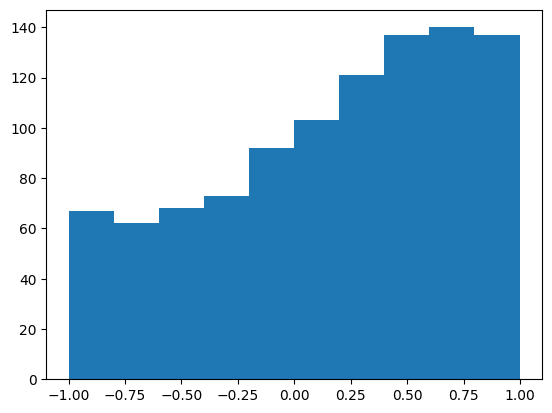

In [14]:
plt.hist(comb_intrins_samps[:,5])

(array([ 68.,  69.,  67.,  91.,  96., 100., 110., 130., 132., 137.]),
 array([-0.99995224, -0.80034434, -0.60073644, -0.40112855, -0.20152065,
        -0.00191276,  0.19769514,  0.39730304,  0.59691093,  0.79651883,
         0.99612672]),
 <BarContainer object of 10 artists>)

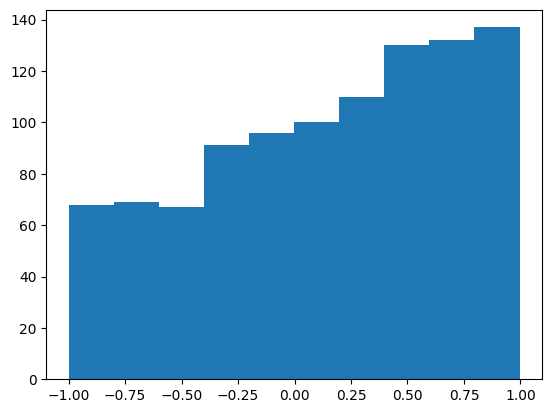

In [15]:
plt.hist(comb_intrins_samps[:,6])